In [91]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt

In [92]:
irisData = pd.read_csv("dataset/iris.csv", header=None)

In [93]:
def splitDataset(dataset):
    feature = dataset.values[:, :-1] 
    label = dataset.values[:, -1]
    feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.2)

    return feature_train, feature_test, label_train, label_test

In [94]:
def normalizeDataset(feature_train, feature_test):
    max_vals = np.max(feature_train, axis=0)
    min_vals = np.min(feature_train, axis=0)
    feature_train_normalized = (feature_train - min_vals) / (max_vals - min_vals)
    feature_test_normalized = (feature_test - min_vals) / (max_vals - min_vals)
    
    return feature_train_normalized, feature_test_normalized

In [95]:
def calculateDistance(feature1, feature2):
    dist =np.sqrt(np.sum((feature1 - feature2)**2))
    
    return dist

In [96]:
def runKnnAlgo(featureData1, featureData2, labelData, k):
    observedResult = []
    for i in range(len(featureData1)):
        distance = []
        topKIndexArray = []
        kLabelList = []
        for j in range(len(featureData2)):
            distance.append(calculateDistance(featureData1[i], featureData2[j]))
        topKIndexArray = np.argsort(distance)[:k]
        kLabelList = [labelData[m] for m in topKIndexArray]
        predictedSpecies = Counter(kLabelList).most_common(1)[0][0]
        observedResult.append(predictedSpecies)
    
    return observedResult

In [97]:
def startAlgo(irisData, k, msg, normalizeData):
    accuracyList = []
    for i in range(20):
        #shuffle data
        irisDataShuffled = shuffle(irisData).reset_index(drop=True)

        #split data
        feature_train, feature_test, label_train, label_test = splitDataset(irisDataShuffled)

        #normalize data
        if(normalizeData):
            feature_train, feature_test = normalizeDataset(feature_train, feature_test)

        #run knn algo

        if(msg=="Training"):
            observedTrainingLabels = runKnnAlgo(feature_train, feature_train, label_train, k)
            observedAccuracy = np.mean(observedTrainingLabels==label_train)*100
        elif(msg=="Testing"):
            observedTestLabels = runKnnAlgo(feature_test, feature_train, label_train, k)
            observedAccuracy = np.mean(observedTestLabels==label_test)*100
        
        accuracyList.append(observedAccuracy)
        
    return np.mean(accuracyList), np.std(accuracyList)

In [98]:
def plotGraphs(mean, stdDev, msg, normalizeData):
    plt.errorbar(range(1, 52, 2), mean, yerr=stdDev, fmt='o-', color='b', ecolor='r', capsize= 3)
    plt.xlabel('k')
    if(normalizeData):
        print("With Normalization")
        plt.ylabel('Average {} Accuracy (%)'.format(msg))
    else:
        print("Without Normalization")
        plt.ylabel('Average {} Accuracy (%)'.format(msg))
    plt.grid(True)
    plt.show()

In [99]:
def KNN(dataset, msg, normalizeData):
    mean = []
    stdDev = []

    for i in range(1,52,2):
        mn, sd = startAlgo(dataset, i, msg, normalizeData)
        mean.append(mn)
        stdDev.append(sd)
    print("Mean for K (1:52:2) (20 runs each)", np.mean(mean))
    print("Std Dev for K (1:52:2) (20 runs each)", np.std(stdDev))
    plotGraphs(mean, stdDev, msg, normalizeData)

Mean for K (1:52:2) (20 runs each) 95.1923076923077
Std Dev for K (1:52:2) (20 runs each) 0.45785281765578906
With Normalization


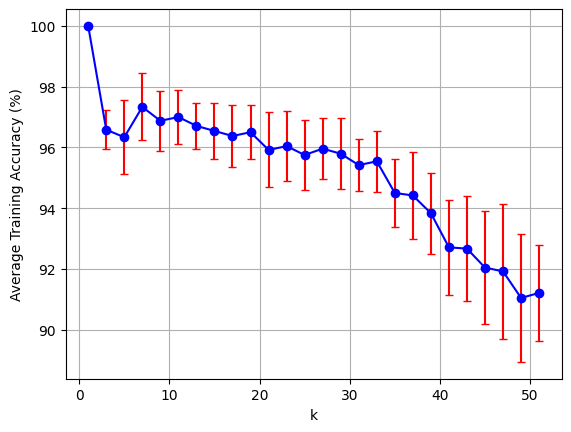

Mean for K (1:52:2) (20 runs each) 94.24999999999999
Std Dev for K (1:52:2) (20 runs each) 1.2107998128582456
With Normalization


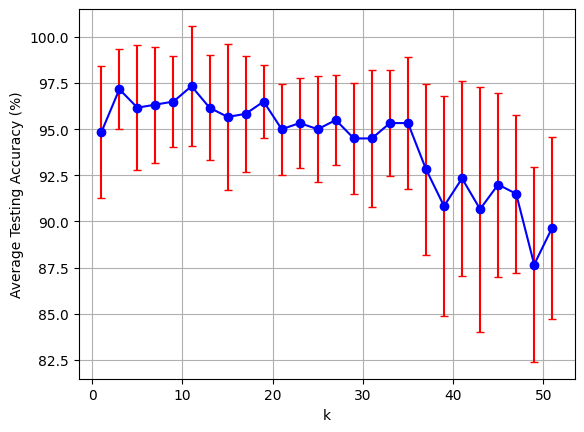

Mean for K (1:52:2) (20 runs each) 95.94230769230771
Std Dev for K (1:52:2) (20 runs each) 0.36266737265120624
Without Normalization


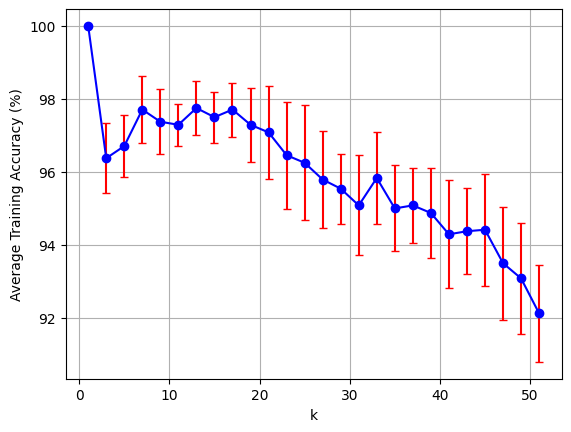

Mean for K (1:52:2) (20 runs each) 94.49358974358974
Std Dev for K (1:52:2) (20 runs each) 1.0475458003165061
Without Normalization


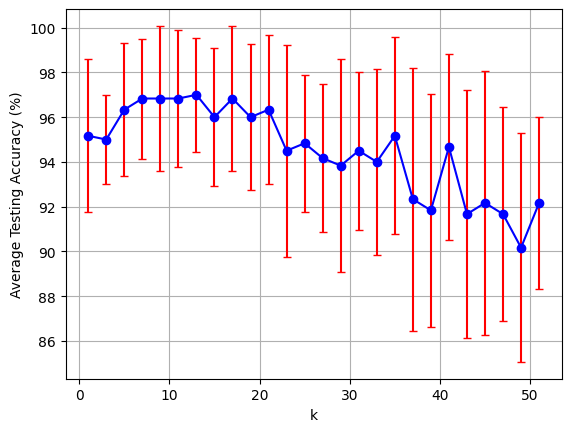

In [100]:
KNN(irisData, "Training", normalizeData=True)
KNN(irisData, "Testing", normalizeData=True)
KNN(irisData, "Training", normalizeData=False)
KNN(irisData, "Testing", normalizeData=False)